In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from random import choices
from turtle import speed
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import preprocessing

In [2]:
df3_1 = pd.read_excel('data3_1.xlsx', header=None)
df3_speed = pd.read_excel('speed.xlsx', header=None)
df3_speed1 = pd.read_excel('speed_1.xlsx', header=None)
df3_positon = pd.read_excel('position.xlsx', header=None)

In [3]:
df3_1 = df3_1.drop(df3_1.index[0])

In [4]:
df3_1 = df3_1[df3_1[7]<5]

In [5]:
x = df3_1.iloc[:,1:]
y = df3_1.iloc[:,0]

In [6]:
x = preprocessing.scale(x)

In [7]:
linear_svr = SVR(kernel='linear')
linear_test = linear_svr.fit(x,y)

In [8]:
X_1 = df3_1.iloc[:,1:8]
X_2 = df3_1.iloc[:,8:]
X_2 = X_2.apply(lambda x:x.astype(float))
X_2 = X_2.values

1、计算适应度

In [9]:
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

def fitness_func(X):
    """计算粒子的的适应度值，也就是目标函数值，X 的维度是 size * 2 """
    X = np.column_stack((X_1, X))
    X = preprocessing.scale(X)
    return linear_test.predict(X)

2、更新速度

In [10]:

def velocity_update(V, X, pbest, gbest, c1, c2, w, max_val):
    """
    根据速度更新公式更新每个粒子的速度
    :param V: 粒子当前的速度矩阵，20*2 的矩阵
    :param X: 粒子当前的位置矩阵，20*2 的矩阵
    :param pbest: 每个粒子历史最优位置，20*2 的矩阵
    :param gbest: 种群历史最优位置，1*2 的矩阵
    """
    size = X.shape[0]
    r1 = np.random.random((size, 1))
    r2 = np.random.random((size, 1))
    V = w*V+c1*r1*(pbest-X)+c2*r2*(gbest-X)
    # 防止越界处理
    for i in range(17):
        max = max_val[i]
        min = -max
        for j in range(266):
            if(V[j,i] > max):
                V[j,i] = max
            elif(V[j,i] < min):
                V[j,i] = min
    return V

3、更新粒子位置

In [11]:
def position_update(X, V):
    """
    根据公式更新粒子的位置
    :param X: 粒子当前的位置矩阵，维度是 20*2
    :param V: 粒子当前的速度举着，维度是 20*2
    """
    M = X+V
    for i in range(17):
        lower = df3_positon.values[i,0]
        upper = df3_positon.values[i,1]
        for j in range(266):
            if(M[j,i] > upper):
                M[j,i] = upper
            elif(M[j,i] < lower):
                M[j,i] = lower
    return M

4、计算损失度

In [12]:
#def loss():

4、main函数

最优值是：0.17269
最优解是：x=3811017.62500,y=0.25000


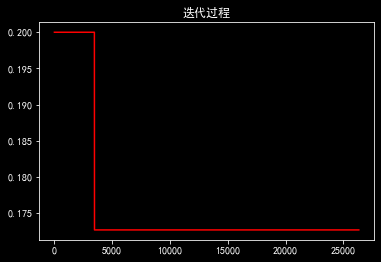

In [13]:
w = 1
c1 = 2
c2 = 2
r1 = None
r2 = None
dim = 17
size = 266
iter_num = 100                       #最大迭代次数
max_val = df3_speed.values              #速度范围
fitness_val_list = []
# 初始化种群各个粒子的位置
X = X_2
# 初始化各个粒子的速度
V = df3_1.iloc[:,8:]
for i in range(dim):
    speed1 = df3_speed.iat[i,0]
    speed2 = -speed1
    for j in range(size):
        V.iat[j,i] = choices([speed2,speed1], [0.5,0.5])[0]
V = V.values
# print(X)
p_fitness = np.array(y)
g_fitness = p_fitness.min()
fitness_val_list.append(g_fitness)

# 初始化的个体最优位置和种群最优位置
pbest = X
gbest = X_2[129,]
# 迭代计算
for i in range(1, iter_num):
    V = velocity_update(V, X, pbest, gbest, c1, c2, w, max_val)
    X = position_update(X, V)
    p_fitness2 = fitness_func(X)
    g_fitness2 = p_fitness2.min()

    # 更新每个粒子的历史最优位置
    for j in range(size):
        if p_fitness[j] > p_fitness2[j]:
            pbest[j] = X[j]
            p_fitness[j] = p_fitness2[j]
        # 更新群体的最优位置
        if g_fitness > g_fitness2:
            gbest = X[p_fitness2.argmin()]
            g_fitness = g_fitness2
        # 记录最优迭代记录
        fitness_val_list.append(g_fitness)
        i += 1

# 输出迭代结果
print("最优值是：%.5f" % fitness_val_list[-1])
print("最优解是：x=%.5f,y=%.5f" % (gbest[0], gbest[1]))

# 绘图
plt.plot(fitness_val_list, color='r')
plt.title('迭代过程')
plt.show()


In [14]:
s = pd.DataFrame(p_fitness)
s.to_excel("对比1_4.xlsx",  encoding= 'UTF-8')